<a href="https://colab.research.google.com/github/PaulaLizasoR/CoderHouse/blob/main/Proyecto_Final_Lizaso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final Data Science I : Deserciones de personal

## **Introducción**

En el entorno corporativo actual la retención de talento se ha convertido en una prioridad estratégica para las organizaciones. La renuncia de empleados no solo implica la pérdida de conocimiento y habilidades valiosas, sino que también conlleva costos significativos relacionados con el reclutamiento y la formación de nuevos colaboradores. Este proyecto tiene como objetivo analizar un conjunto de datos de empleados para identificar patrones y factores que puedan predecir la probabilidad de renuncia. A través de un análisis de las variables relacionadas con el desempeño, la satisfacción y las características demográficas, se busca proporcionar información valiosa que permita al departamento de recursos humanos implementar estrategias efectivas para mejorar la retención de empleados.

### Hipótesis

Se plantea la hipótesis de que los empleados que presentan niveles de satisfacción laboral y posibilidades de ascenso bajos en entornos con alta carga laboral (como podría ser un número elevado de horas extras) tienen una mayor probabilidad de renunciar.

### Objetivo

El objetivo principal de este proyecto es desarrollar un modelo predictivo que evalúe la probabilidad de renuncia de los empleados en una empresa.

### Glosario

* Employee ID: Identificador de empleado.
* Age: Edad del empleado.
* Gender: Género del empleado.
* Years at Company: Años que el empleado lleva trabajando para la empresa.
* Monthly Income: Salario mensual en dólares (USD).
* Job Role: El departamento o función en el que trabaja el empleado, codificado en categorías como Finanzas, Sanidad, Tecnología, Educación y Medios de comunicación.
* Work-Life Balance: Equilibrio percibido por el empleado entre trabajo y vida personal, (Poor, Below Average, Good, Excellent)
* Job Satisfaction: La satisfacción del empleado con su trabajo: (Very Low, Low, Medium, High)
* Performance Rating: La calificación del rendimiento del empleado: (Low, Below Average, Average, High)
* Number of Promotions: El número total de promociones que ha recibido el empleado.
* Distance from Home: La distancia entre el domicilio del trabajador y su lugar de trabajo, en millas.
* Education Level: Nivel educativo más alto alcanzado por el empleado: (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD)
* Marital Status: El estado civil del empleado: (Divorced, Married, Single)
* Job Level: El nivel laboral del empleado: (Entry, Mid, Senior)
* Company Size: El tamaño de la empresa para la que trabaja el empleado: (Small,Medium,Large)
* Company Tenure: El número total de años que el empleado lleva trabajando en el sector.
* Remote Work: Si el empleado trabaja de forma remota: (Yes or No)
* Leadership Opportunities: Si el empleado tiene oportunidades de liderazgo: (Yes or No)
* Innovation Opportunities: Si el empleado tiene oportunidades para innovar: (Yes or No)
* Company Reputation: La percepción que tienen los empleados de la reputación de la empresa: (Very Poor, Poor,Good, Excellent)
* Employee Recognition: El nivel de reconocimiento que recibe el empleado:(Very Low, Low, Medium, High)
* Attrition: Si el empleado ha dejado la empresa, codificado como 0 (se ha quedado) y 1 (ha renunciado).

### Fuente

La base de datos se obtuvo de la plataforma Kaggle.
Fuente : https://www.kaggle.com/datasets/stealthtechnologies/employee-attrition-dataset?select=test.csv

## **Importaciones**

In [1]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Curso Coderhouse/Machine Learning I/Base de Datos'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Curso Coderhouse/Machine Learning I/Base de Datos


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
train_df = pd.read_csv('/content/gdrive/MyDrive/Curso Coderhouse/Machine Learning I/Base de Datos/train.csv')
test_df = pd.read_csv('/content/gdrive/MyDrive/Curso Coderhouse/Machine Learning I/Base de Datos/test.csv')

In [4]:
# Creo un nuevo dataframe con ambos cvs
data = pd.concat([train_df, test_df], ignore_index=True)

## **Transformación y limpieza de datos**

In [5]:
#Comenzamos viendo la base de datos completa
data

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74493,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0,...,0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
74494,47175,30,Female,15,Education,3856,Good,Medium,Average,2,...,0,Entry,Medium,20,No,No,No,Good,Medium,Left
74495,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0,...,4,Mid,Small,7,No,No,No,Good,High,Left
74496,9554,18,Male,4,Education,5276,Fair,High,Average,0,...,3,Mid,Large,5,No,No,No,Poor,High,Stayed


In [6]:
# Con .describe vemos un resumen estadístico de las variables númericas
data.describe().round().T

,count,mean,std,min,25%,50%,75%,max
Employee ID,74498.0,37250.0,21506.0,1.0,18625.0,37250.0,55874.0,74498.0
Age,74498.0,39.0,12.0,18.0,28.0,39.0,49.0,59.0
Years at Company,74498.0,16.0,11.0,1.0,7.0,13.0,23.0,51.0
Monthly Income,74498.0,7299.0,2153.0,1226.0,5652.0,7348.0,8876.0,16149.0
Number of Promotions,74498.0,1.0,1.0,0.0,0.0,1.0,2.0,4.0
Distance from Home,74498.0,50.0,29.0,1.0,25.0,50.0,75.0,99.0
Number of Dependents,74498.0,2.0,2.0,0.0,0.0,1.0,3.0,6.0
Company Tenure,74498.0,56.0,25.0,2.0,36.0,56.0,76.0,128.0


In [7]:
# Acá podemos ver una información completa de las columnas del data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               74498 non-null  int64 
 1   Age                       74498 non-null  int64 
 2   Gender                    74498 non-null  object
 3   Years at Company          74498 non-null  int64 
 4   Job Role                  74498 non-null  object
 5   Monthly Income            74498 non-null  int64 
 6   Work-Life Balance         74498 non-null  object
 7   Job Satisfaction          74498 non-null  object
 8   Performance Rating        74498 non-null  object
 9   Number of Promotions      74498 non-null  int64 
 10  Overtime                  74498 non-null  object
 11  Distance from Home        74498 non-null  int64 
 12  Education Level           74498 non-null  object
 13  Marital Status            74498 non-null  object
 14  Number of Dependents  

In [8]:
# Vemos un conteo total de datos nulos
data.isnull().sum()

,0
Employee ID,0
Age,0
Gender,0
Years at Company,0
Job Role,0
Monthly Income,0
Work-Life Balance,0
Job Satisfaction,0
Performance Rating,0
Number of Promotions,0


In [9]:
# y si hay datos duplicados o no
data.duplicated().sum()

0

In [10]:
# Elimino la columna Employee ID y Company Tenure ya que no me resulta relevante para el proyecto
data.drop(columns=['Employee ID'], inplace=True)
data.drop(columns=['Company Tenure'], inplace=True)

## Análisis exploratorio de Datos

El análisis exploratorio de datos (AED) es crucial en un proyecto de renuncias en una empresa, ya que permite identificar patrones y tendencias, detectar anomalías y entender las causas subyacentes de las renuncias. Al proporcionar información clara y visual, el AED facilita la toma de decisiones informadas y la priorización de recursos para mejorar el clima laboral y las políticas de retención. Esto, a su vez, contribuye a crear un entorno más atractivo para los empleados, reduciendo así los costos asociados con la rotación de personal.

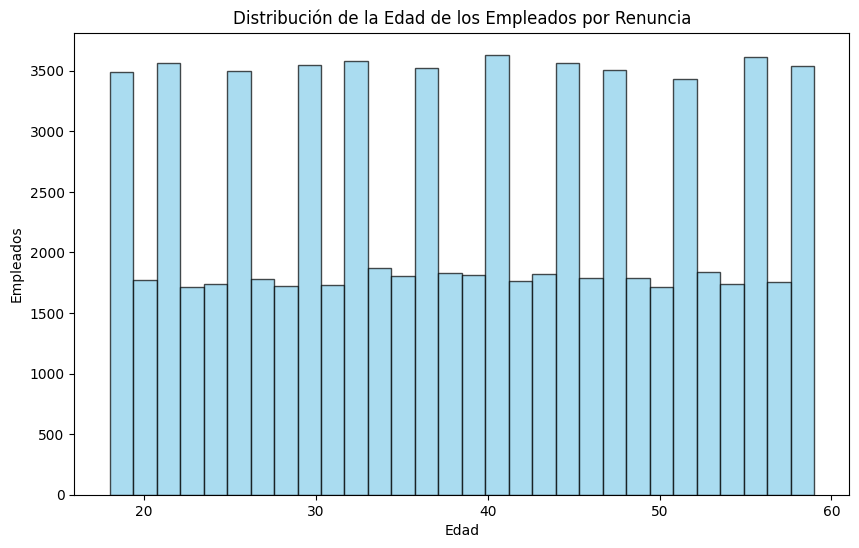

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(data=data, x='Age',bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribución de la Edad de los Empleados por Renuncia')
plt.xlabel('Edad')
plt.ylabel('Empleados')
plt.show()

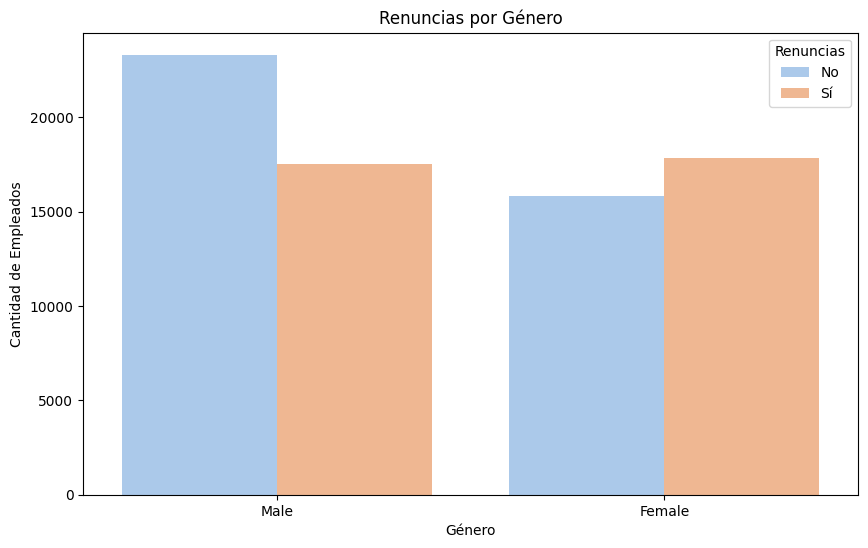

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Gender', hue= 'Attrition', palette='pastel')
plt.title('Renuncias por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Empleados')
plt.legend(title='Renuncias', loc='upper right', labels=['No', 'Sí'])
plt.show()

Gracias a este gráfico podemos observar que entre los empleados masculinos, hay un número significativamente mayor de quienes permanecen en la empresa en comparación con los que renuncian, lo que sugiere una mayor satisfacción laboral. En contraste, las empleadas femeninas son menos numerosas y presentan una proporción de renuncias más alta, indicando posibles desafíos como falta de oportunidades de crecimiento o insatisfacción con el ambiente laboral. Esto resalta la necesidad de implementar estrategias específicas para mejorar la retención del talento femenino.

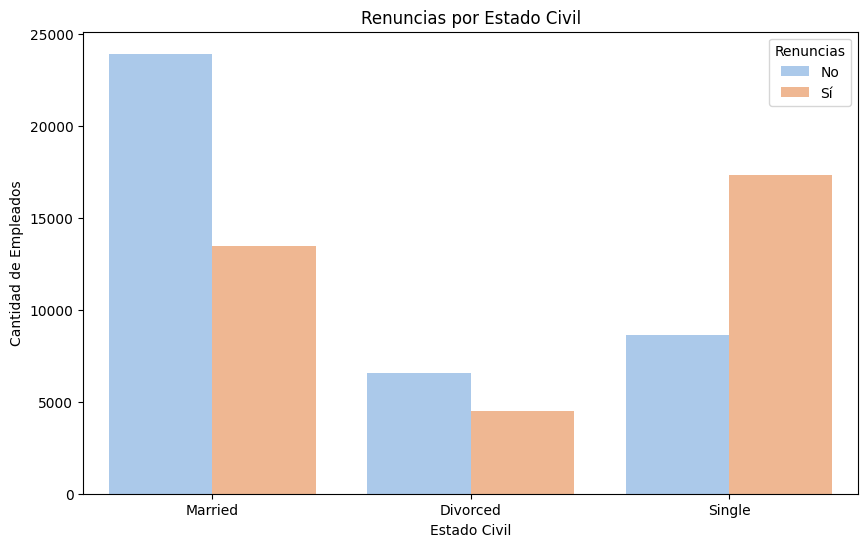

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Marital Status', hue= 'Attrition', palette='pastel')
plt.title('Renuncias por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad de Empleados')
plt.legend(title='Renuncias', loc='upper right', labels=['No', 'Sí'])
plt.show()

El gráfico de Renuncias por Estado Civil revela que los empleados casados tienen una alta proporción de permanencia en la empresa, lo que sugiere una mayor estabilidad y satisfacción en sus roles. En contraste, los empleados solteros muestran una mayor inclinación a renunciar, lo que podría indicar una búsqueda de nuevas oportunidades o insatisfacción laboral. Curiosamente, aunque los empleados divorciados representan una minoría en la organización, también tienden a preferir quedarse, lo que sugiere que su experiencia laboral podría ser positiva y compensar sus desafíos personales.

Como consecuencia de los datos anteriores, surgen otras interrogantes que merecen ser exploradas.
Por ejemplo, ¿Qué factores contribuyen a la insatisfacción laboral de las empleadas femeninas? ¿Y la de los empleados solteros?

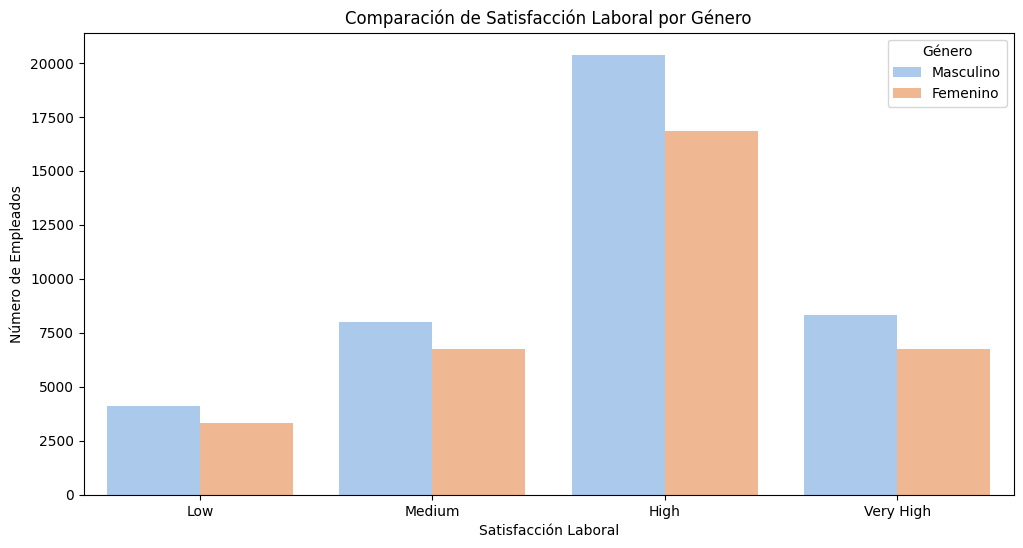

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Job Satisfaction', hue='Gender', palette='pastel',
               order=['Low', 'Medium', 'High','Very High'])
plt.title('Comparación de Satisfacción Laboral por Género')
plt.xlabel('Satisfacción Laboral')
plt.ylabel('Número de Empleados')
plt.legend(title='Género', loc='upper right', labels=['Masculino', 'Femenino'])
plt.show()

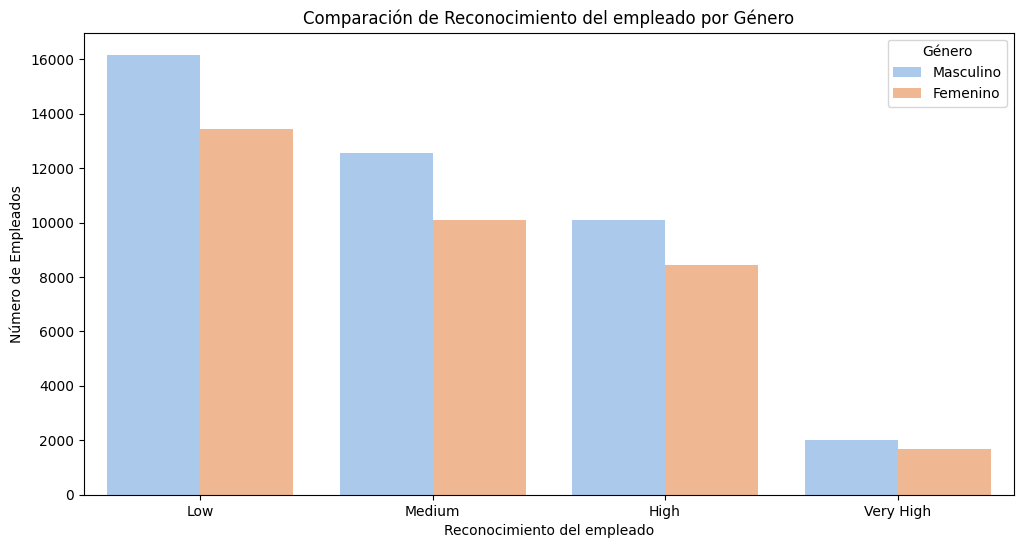

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Employee Recognition', hue='Gender', palette='pastel',
               order=['Low', 'Medium', 'High','Very High'])
plt.title('Comparación de Reconocimiento del empleado por Género')
plt.xlabel('Reconocimiento del empleado')
plt.ylabel('Número de Empleados')
plt.legend(title='Género', loc='upper right', labels=['Masculino', 'Femenino'])
plt.show()

La comparación entre la satisfacción laboral y el reconocimiento del empleado por género revela que no existen diferencias significativas entre hombres y mujeres en cuanto a su satisfacción y reconocimiento por parte de la empresa. Ambos gráficos indican que, aunque hay una ligera variación en los niveles de satisfacción y reconocimiento, esta diferencia no es lo suficientemente marcada como para concluir que uno de los géneros recibe un trato preferencial. Además, la discrepancia observada podría explicarse en parte por la diferencia en el número de empleados contratados de cada género, lo que sugiere que la muestra puede influir en las percepciones de satisfacción y reconocimiento. En resumen, los resultados sugieren que el género no es un factor determinante en la satisfacción laboral ni en el reconocimiento recibido por parte de la empresa.

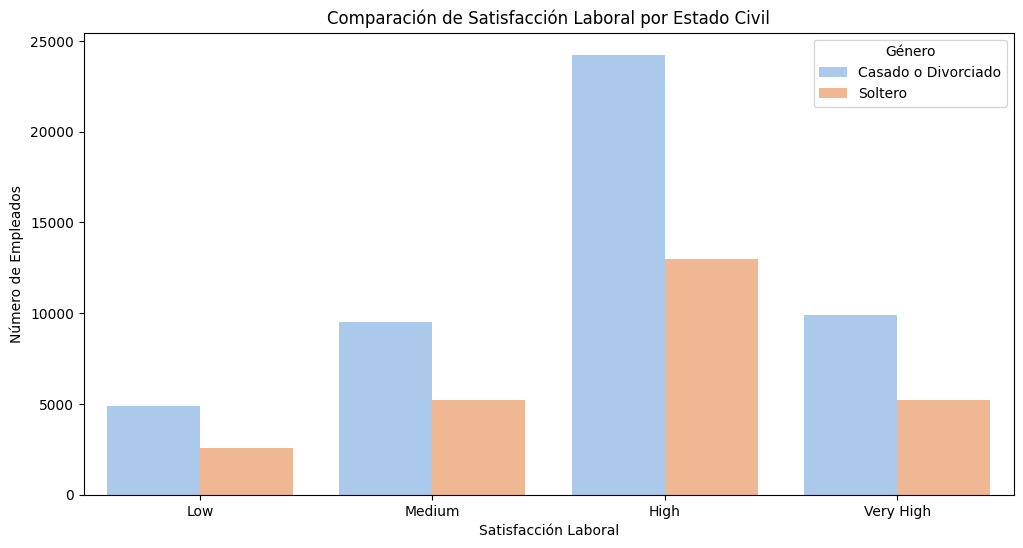

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Job Satisfaction', hue= data['Marital Status']=='Single', palette='pastel',
               order=['Low', 'Medium', 'High','Very High'])
plt.title('Comparación de Satisfacción Laboral por Estado Civil')
plt.xlabel('Satisfacción Laboral')
plt.ylabel('Número de Empleados')
plt.legend(title='Género', loc='upper right', labels=['Casado o Divorciado', 'Soltero'])
plt.show()

Por el contrario, el análisis revela una notable disparidad en los niveles de satisfacción laboral entre empleados solteros y aquellos que no lo son. Los datos muestran que, afortunadamente, el porcentaje más alto corresponde a la categoría de satisfacción alta ('high'), pero la diferencia entre solteros y no solteros es significativa. Los empleados no solteros presentan una satisfacción laboral considerablemente más alta, lo que sugiere que factores como la estabilidad personal y el apoyo familiar pueden influir positivamente en su experiencia laboral. Esta observación destaca la importancia de considerar el estado civil como un factor relevante en el análisis de la satisfacción laboral dentro de la organización.

Otro factor muy importante a la hora de analizar las razones por la cual un empleado podría renunciar o no es el salario mensual. La compensación económica no solo afecta directamente la satisfacción laboral, sino que también influye en la percepción de reconocimiento y valor dentro de la empresa. Un salario competitivo puede ser un incentivo significativo para la retención de talento, mientras que una remuneración insatisfactoria puede aumentar la probabilidad de que los empleados busquen oportunidades en otros lugares.

<ipython-input-17-8bcc82d9c64e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Monthly Income', palette='pastel')


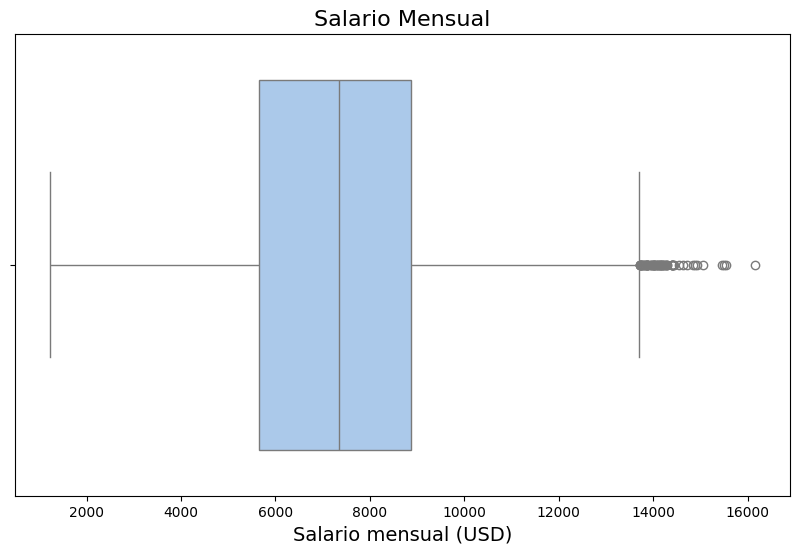

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Monthly Income', palette='pastel')
plt.title('Salario Mensual', fontsize=16)
plt.xlabel('Salario mensual (USD)', fontsize=14)
plt.show()

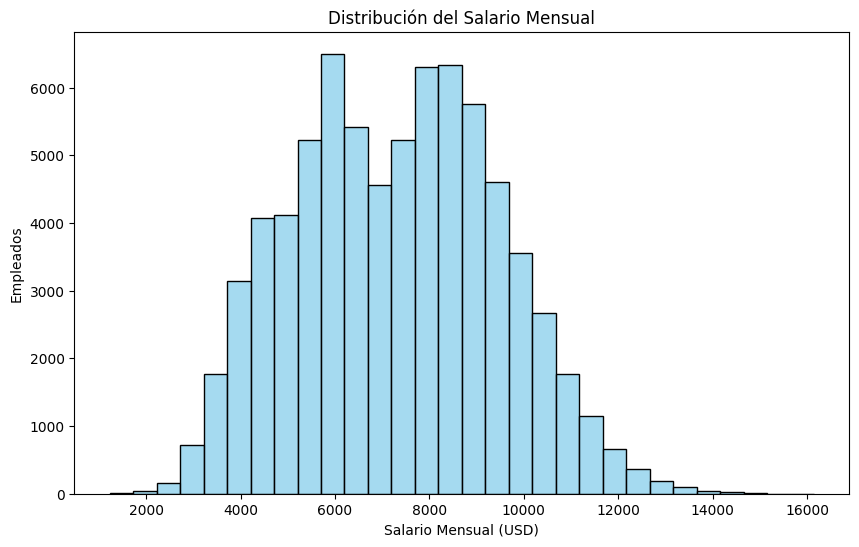

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Monthly Income'], color='skyblue', edgecolor='black',bins=30)
plt.title('Distribución del Salario Mensual')
plt.xlabel('Salario Mensual (USD)')
plt.ylabel('Empleados')
plt.show()

<ipython-input-19-ddac8430ac15>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= data, y= 'Gender', x= 'Monthly Income', palette='pastel')


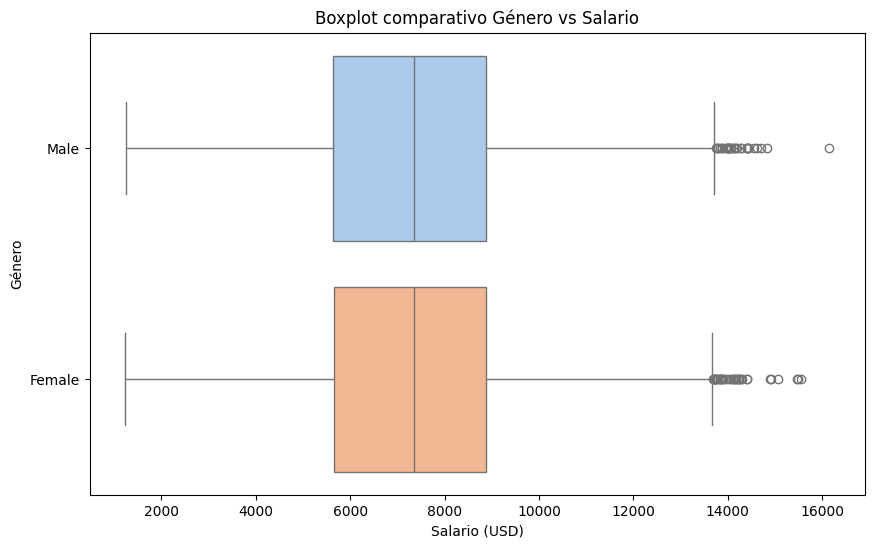

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(data= data, y= 'Gender', x= 'Monthly Income', palette='pastel')
plt.title('Boxplot comparativo Género vs Salario')
plt.ylabel('Género')
plt.xlabel('Salario (USD)')
plt.show()

<ipython-input-20-98603ba3c62e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= data, y= 'Marital Status', x= 'Monthly Income', palette='pastel')


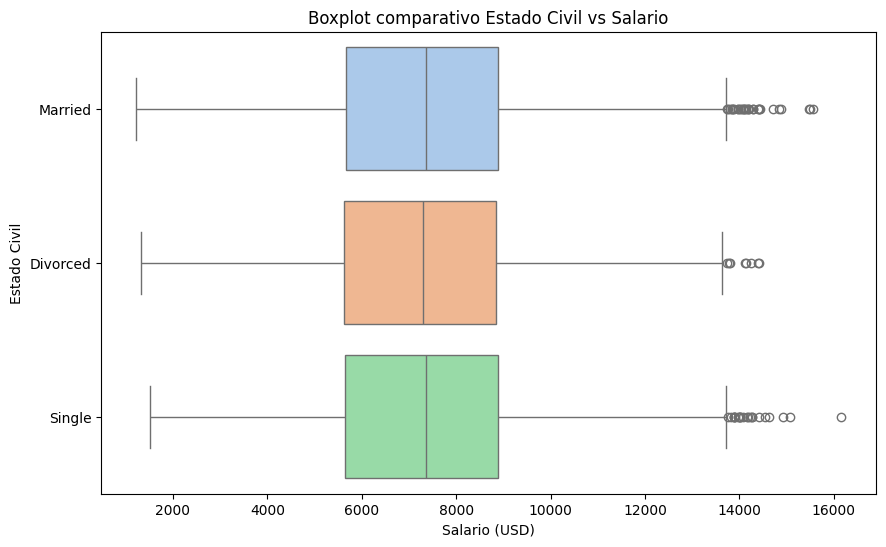

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(data= data, y= 'Marital Status', x= 'Monthly Income', palette='pastel')
plt.title('Boxplot comparativo Estado Civil vs Salario')
plt.ylabel('Estado Civil')
plt.xlabel('Salario (USD)')
plt.show()

La comparación de los boxplots de género y estado civil frente al salario mensual revela que, a pesar de no observar diferencias significativas en los cuartiles de ambos grupos, la presencia de outliers sugiere que hay casos atípicos que podrían influir en la interpretación de los datos. Estos outliers pueden representar situaciones excepcionales, como empleados en posiciones de alta dirección o roles altamente especializados, que no reflejan la tendencia general de salarios dentro de cada categoría.

Otra área muy importante a analizar puede ser el bienestar laboral, ¿ hay relación entre las horas extras que ejercen los empleados y las renuncias? ¿Cómo perciben los empleados el balance entre el trabajo y su vida personal?

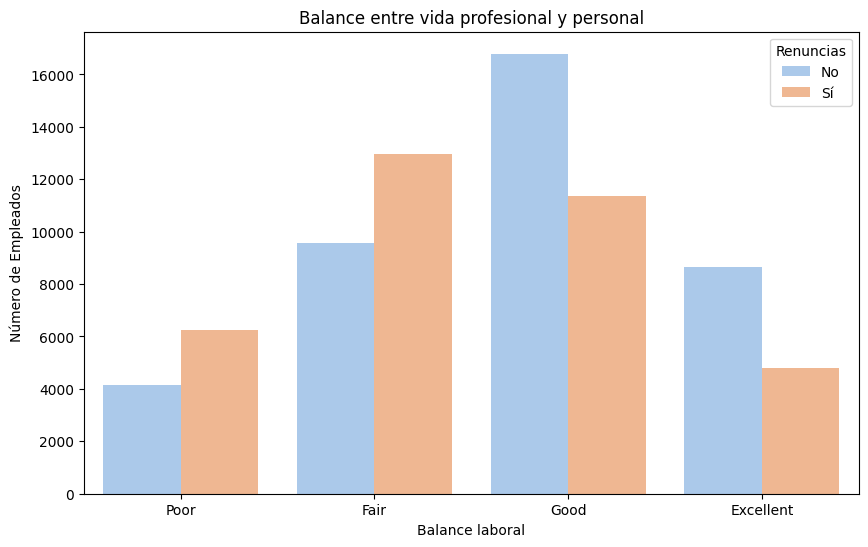

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Work-Life Balance', hue='Attrition', palette='pastel',
              order=['Poor', 'Fair', 'Good','Excellent'])
plt.title('Balance entre vida profesional y personal')
plt.xlabel('Balance laboral')
plt.ylabel('Número de Empleados')
plt.legend(title='Renuncias', loc='upper right', labels=['No', 'Sí'])
plt.show()

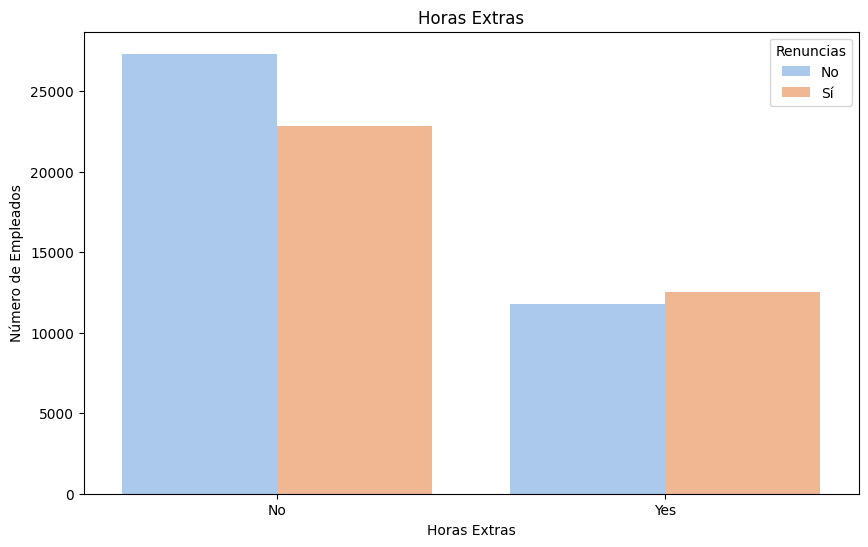

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Overtime', hue='Attrition', palette='pastel')
plt.title('Horas Extras')
plt.xlabel('Horas Extras')
plt.ylabel('Número de Empleados')
plt.legend(title='Renuncias', loc='upper right', labels=['No', 'Sí'])
plt.show()

Los gráficos muestran una clara tendencia en la relación entre la renuncia de empleados y dos factores clave: el equilibrio entre vida profesional y personal y las horas extras trabajadas. Los empleados que perciben un balance pobre en su vida personal son más propensos a renunciar, indicando que esta insatisfacción puede influir en su decisión de dejar la empresa. Asimismo, el aumento de horas extras se asocia con una mayor tasa de renuncias. Estos hallazgos resaltan la necesidad de políticas que promuevan un mejor balance entre trabajo y vida personal, así como una gestión adecuada de la carga laboral, para mejorar la retención de talento.

<ipython-input-23-c84589b8cba6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Years at Company', palette='pastel')


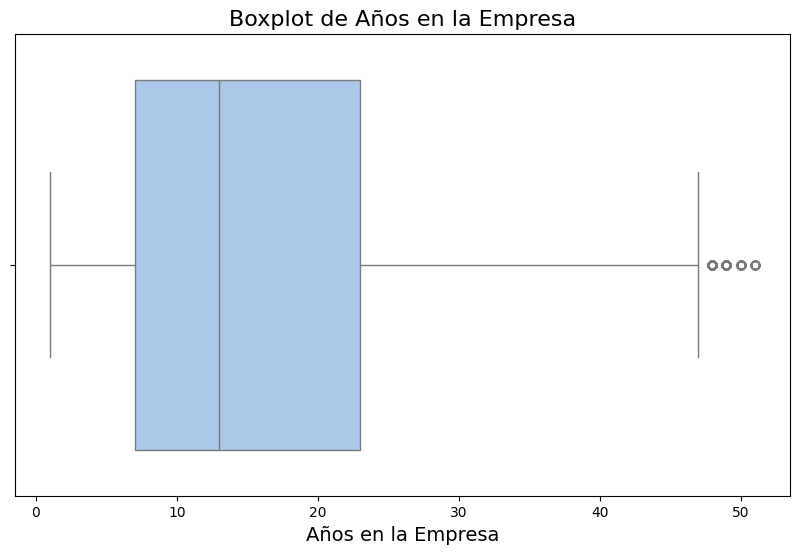

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Years at Company', palette='pastel')
plt.title('Boxplot de Años en la Empresa', fontsize=16)
plt.xlabel('Años en la Empresa', fontsize=14)
plt.show()


A través de este boxplot, se identifican varios outliers en la variable 'Años en la compañía' ('Years at Company'). Para determinar si estos valores son errores humanos que deben ser eliminados, aplicaré el método del Inter Quartile Range (IQR). En este análisis, compararé únicamente la columna 'Años en la compañía' con la columna 'Edad'. Si no existe una relación lógica entre la edad del empleado y los años que ha trabajado, esto indicaría que los datos podrían ser incorrectos.

In [24]:
columnas_comparar = ['Years at Company', 'Age']  # Añade las columnas que desees

# Calcula el IQR para 'Years at Company'
Q1 = data['Years at Company'].quantile(0.25)
Q3 = data['Years at Company'].quantile(0.75)
IQR = Q3 - Q1

# Define los límites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Encuentra los outliers
outliers = data[(data['Years at Company'] < lower_bound) |
                          (data['Years at Company'] > upper_bound)]

# Imprimir los resultados
print(f"Límite inferior: {lower_bound}")
print(f"Límite superior: {upper_bound}")
print(f"Número de outliers en 'Years at Company': {len(outliers)}")
print("Outliers encontrados:")
print(outliers[columnas_comparar])

Límite inferior: -17.0
Límite superior: 47.0
Número de outliers en 'Years at Company': 338
Outliers encontrados:
       Years at Company  Age
465                  48   58
662                  49   57
843                  49   59
1373                 48   56
1567                 48   59
...                 ...  ...
73109                48   57
74041                48   57
74045                51   59
74304                48   56
74497                48   59

[338 rows x 2 columns]


Como era de esperar, la proporción entre los años trabajados y la edad no tiene sentido. Para que estos empleados hayan estado en la compañía más de 50 años, tendrían que haber comenzado a trabajar en su infancia, lo cual es improbable. Esto refuerza la necesidad de revisar y posiblemente eliminar estos outliers.

In [25]:
#Creo un nuevo dataframe con datos limpios
data_limpio = data[(data['Years at Company'] >= lower_bound) &
                   (data['Years at Company'] <= upper_bound)]

<ipython-input-26-83aa261b4dce>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Company Reputation', palette='pastel',


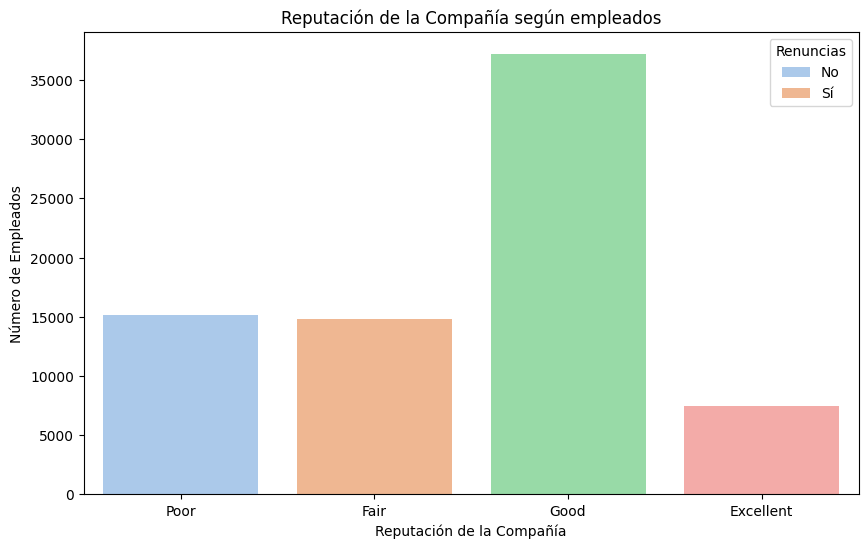

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Company Reputation', palette='pastel',
              order=['Poor', 'Fair', 'Good','Excellent'])

plt.title('Reputación de la Compañía según empleados')
plt.xlabel('Reputación de la Compañía')
plt.ylabel('Número de Empleados')
plt.legend(title='Renuncias', loc='upper right', labels=['No', 'Sí'])
plt.show()

Se puede concluir que un gran porcentaje de empleados, incluidos aquellos que han renunciado, consideran a la empresa un buen lugar para trabajar. Sin embargo, aunque esta percepción positiva es notable, la proporción de quienes la califican como excelente es considerablemente menor, y hay un número significativo de empleados que la consideran pobre. Esto sugiere que, a pesar de que muchos valoran la empresa positivamente, aún existen áreas de mejora que podrían fortalecer aún más su reputación como un excelente lugar para trabajar.

### Correlación entre variables

In [ ]:
# No logré que me salga bien el gráfico de correlación

In [23]:
#columnas_selec = ['Age','Years at Company','Monthly Income','Number of Promotions']
#columnas_categoricas = ['Job Satisfaction','Employee Recognition','Performance Rating','Attrition']

#data_categoricas = pd.get_dummies(data_empleados[columnas_categoricas], drop_first=True)

#columnas_comb = pd.concat([data_empleados[columnas_numericas], data_categoricas], axis=1)
#empleados_mx = columnas_comb.corr()
#empleados_mx

#sns.heatmap(empleados_mx, annot=True, fmt=".2f", cmap='coolwarm',
            #square=True,)
#plt.title('Mapa de Calor de la Matriz de Correlación - Empleados', fontsize=16)
#plt.xticks(rotation=45)
#plt.yticks(rotation=0)
#plt.show()

In [27]:
data_limpio.columns


Index(['Age', 'Gender', 'Years at Company', 'Job Role', 'Monthly Income',
       'Work-Life Balance', 'Job Satisfaction', 'Performance Rating',
       'Number of Promotions', 'Overtime', 'Distance from Home',
       'Education Level', 'Marital Status', 'Number of Dependents',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

# Modelado

## Preparación para el modelado

In [32]:
# Convierto variables categóricas a numéricas
data_empleados = pd.get_dummies(data_limpio, columns=['Gender', 'Job Role',
       'Work-Life Balance', 'Job Satisfaction', 'Performance Rating',
       'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition'])
data_empleados


,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Attrition,Gender_Female,Gender_Male,Job Role_Education,...,Innovation Opportunities_No,Innovation Opportunities_Yes,Company Reputation_Excellent,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_High,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
0,31,19,5390,2,22,0,Stayed,False,True,True,...,True,False,True,False,False,False,False,False,True,False
1,59,4,5534,3,21,3,Stayed,True,False,False,...,True,False,False,True,False,False,False,True,False,False
2,24,10,8159,0,11,3,Stayed,True,False,False,...,True,False,False,False,False,True,False,True,False,False
3,36,7,3989,1,27,2,Stayed,True,False,True,...,True,False,False,False,True,False,False,False,True,False
4,56,41,4821,0,71,0,Stayed,False,True,True,...,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74492,52,13,9296,1,31,1,Stayed,False,True,False,...,True,False,False,False,False,True,False,True,False,False
74493,56,42,7830,0,40,0,Stayed,True,False,False,...,True,False,False,False,False,True,False,False,True,False
74494,30,15,3856,2,45,0,Left,True,False,True,...,True,False,False,False,True,False,False,False,True,False
74495,52,5,5654,0,4,4,Left,False,True,True,...,True,False,False,False,True,False,True,False,False,False


In [33]:
data_empleados.columns

Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents', 'Attrition',
       'Gender_Female', 'Gender_Male', 'Job Role_Education',
       'Job Role_Finance', 'Job Role_Healthcare', 'Job Role_Media',
       'Job Role_Technology', 'Work-Life Balance_Excellent',
       'Work-Life Balance_Fair', 'Work-Life Balance_Good',
       'Work-Life Balance_Poor', 'Job Satisfaction_High',
       'Job Satisfaction_Low', 'Job Satisfaction_Medium',
       'Job Satisfaction_Very High', 'Performance Rating_Average',
       'Performance Rating_Below Average', 'Performance Rating_High',
       'Performance Rating_Low', 'Overtime_No', 'Overtime_Yes',
       'Education Level_Associate Degree', 'Education Level_Bachelor’s Degree',
       'Education Level_High School', 'Education Level_Master’s Degree',
       'Education Level_PhD', 'Marital Status_Divorced',
       'Marital Status_Married', 'Marital Status_Single', 'Job Level_Entry',
     

In [34]:
# Convierto las variables booleanas en binarias donde agrego un condicional para no reemplazar los datos numéricos
data_empleados= data_empleados.map(lambda x: 1 if x == True else 0 if x is False else x)
data_empleados

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Attrition,Gender_Female,Gender_Male,Job Role_Education,...,Innovation Opportunities_No,Innovation Opportunities_Yes,Company Reputation_Excellent,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_High,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
0,31,19,5390,2,22,0,Stayed,0,1,1,...,1,0,1,0,0,0,0,0,1,0
1,59,4,5534,3,21,3,Stayed,1,0,0,...,1,0,0,1,0,0,0,1,0,0
2,24,10,8159,0,11,3,Stayed,1,0,0,...,1,0,0,0,0,1,0,1,0,0
3,36,7,3989,1,27,2,Stayed,1,0,1,...,1,0,0,0,1,0,0,0,1,0
4,56,41,4821,0,71,0,Stayed,0,1,1,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74492,52,13,9296,1,31,1,Stayed,0,1,0,...,1,0,0,0,0,1,0,1,0,0
74493,56,42,7830,0,40,0,Stayed,1,0,0,...,1,0,0,0,0,1,0,0,1,0
74494,30,15,3856,2,45,0,Left,1,0,1,...,1,0,0,0,1,0,0,0,1,0
74495,52,5,5654,0,4,4,Left,0,1,1,...,1,0,0,0,1,0,1,0,0,0


In [35]:
# Selecciono la variable objetivo (Y) y variables independientes (X)
X = data_empleados.drop(columns=['Attrition'])
y = data_empleados['Attrition']


## Training


Elijo un modelo de aprendizaje supervisado para esta base de datos porque el objetivo principal es predecir una variable categórica específica: la renuncia de empleados, representada como 'Attrition'. En este contexto, el aprendizaje supervisado es especialmente adecuado ya que se basa en un conjunto de datos etiquetados, donde conocemos las salidas correspondientes a las entradas. Esto permite entrenar el modelo utilizando ejemplos históricos de empleados que han renunciado y aquellos que se han quedado, lo que facilita la identificación de patrones y relaciones en los datos.

### Regresión Logística

Como primer modelo que utilizo para analizar es el de Regresión Logística ya que creo que es una técnica ideal para modelar la probabilidad de renuncia de empleados en función de diversas características, ya que permite analizar y cuantificar la relación entre variables independientes (tanto categóricas como continuas) y una variable dependiente binaria.

In [36]:
# Importo librerías
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [37]:
# Defino datos de entrenamiento (70%) y datos de prueba(30%) .
# Random_state:Establece una semilla de números aleatorios que asegura que el código sea reproducible cada vez que lo corra.
# shuffle=True: Mezcla el orden de los datos para evitar sesgos.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True)

In [38]:
# Creo el modelo de regresión logística
modelo = LogisticRegression(max_iter=1000)

# Entreno el modelo
modelo.fit(X_train, y_train)

# Realizo predicciones en el conjunto de pruebas
y_pred = modelo.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

Matriz de confusión:
[[7791 2824]
 [2675 8958]]


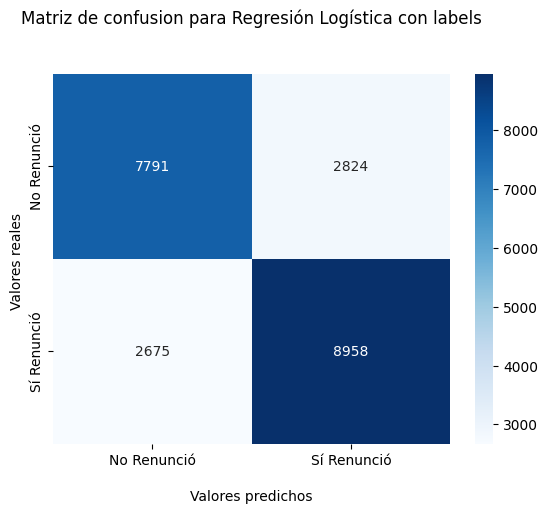

In [40]:
# Gráfico de Matriz de Confusión
rl_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(rl_matrix, annot=True, fmt='g', cmap='Blues')
ax.set_title('Matriz de confusion para Regresión Logística con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
ax.xaxis.set_ticklabels(['No Renunció', 'Sí Renunció'])
ax.yaxis.set_ticklabels(['No Renunció', 'Sí Renunció'])
plt.show()

La matriz de confusión muestra cómo se comportó el modelo en términos de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos:

- 7791 (Verdaderos Negativos): Empleados que se quedaron y el modelo predijo correctamente que se quedarían.
- 2824 (Falsos Positivos): Empleados que se quedaron, pero el modelo predijo que renunciarían.
- 2675 (Falsos Negativos): Empleados que renunciaron, pero el modelo predijo que se quedarían.
- 8958 (Verdaderos Positivos): Empleados que renunciaron y el modelo predijo correctamente que renunciarían.

In [41]:
# Obtenemos un informe que muestra las métricas de rendimiento del modelo
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

        Left       0.74      0.73      0.74     10615
      Stayed       0.76      0.77      0.77     11633

    accuracy                           0.75     22248
   macro avg       0.75      0.75      0.75     22248
weighted avg       0.75      0.75      0.75     22248



Como resultado tenemos:
 * En Precisión : Proporción de verdaderos positivos respecto a todas las predicciones positivas.
    - Left (Renunció): 0.74 significa que de todas las veces que el modelo predijo que un empleado renunciaría, el 74% fueron correctas
    - Stayed (Se quedó): 0.76 significa que de todas las veces que el modelo predijo que un empleado se quedaría, el 76% fueron correctas.

 * En Recall : Proporción de verdaderos positivos sobre el total de verdaderos positivos y falsos negativos.
    - Left (Renunció): 0.73 indica que el modelo identificó correctamente el 73% de los empleados que realmente renunciaron.
    - Stayed (Se quedó): 0.77 indica que el modelo identificó correctamente el 77% de los empleados que realmente se quedaron.

 * En F1-Score: Una medida combinada de precisión y recall.
    - Left: 0.74
    - Stayed: 0.77
  Esto indica un buen equilibrio entre precisión y recall para ambas clases.

In [42]:
# Calculamos la precisión general del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

Precisión del modelo: 0.75


### K-Nearest Neighbors (KNN)

El modelo KNN es un algoritmo de clasificación que se basa en la idea de que las instancias que están más cercanas entre sí son más similares.

In [43]:
# Importo librerías
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Como ya tengo definidos los datos de entrenamiento de entrenamiento gracias al modelo anterior no es necesario redefinirlos.

In [44]:
# Creo una instancia
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo
knn.fit(X_train, y_train)

# Realizar predicciones
y_pred = knn.predict(X_test)

# Evaluar el modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

Matriz de confusión:
[[5026 5589]
 [5078 6555]]

Reporte de clasificación:
              precision    recall  f1-score   support

        Left       0.50      0.47      0.49     10615
      Stayed       0.54      0.56      0.55     11633

    accuracy                           0.52     22248
   macro avg       0.52      0.52      0.52     22248
weighted avg       0.52      0.52      0.52     22248

Precisión del modelo: 0.52


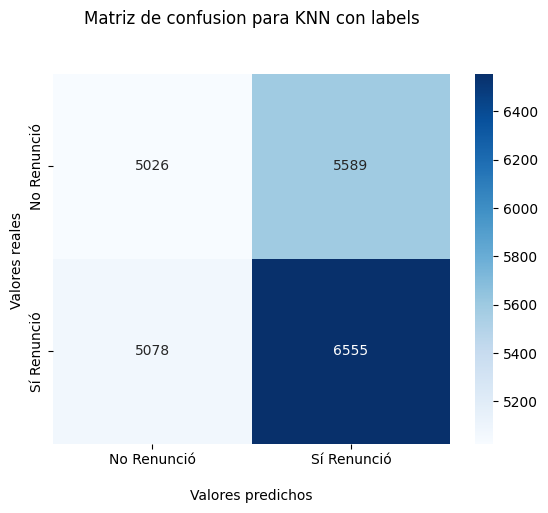

In [45]:
# Gráfico de Matriz de Confusión para KNN
knn_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(knn_matrix, annot=True, fmt='g', cmap='Blues')
ax.set_title('Matriz de confusion para KNN con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
ax.xaxis.set_ticklabels(['No Renunció', 'Sí Renunció'])
ax.yaxis.set_ticklabels(['No Renunció', 'Sí Renunció'])
plt.show()

### Random Forest

Como último modelo de pruebo utilizo Random Forest

In [46]:
# Importo las librerías correspondientes a Random Forest
from sklearn.ensemble import RandomForestClassifier

In [47]:
# Creo el modelo
modelo_rf = RandomForestClassifier(n_jobs=-1)

# Entreno el modelo
modelo_rf.fit(X_train, y_train)

# Realizo predicciones
y_pred = modelo_rf.predict(X_test)

# Evalúo el modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy_rf:.2f}")

Matriz de confusión:
[[7809 2806]
 [2831 8802]]

Reporte de clasificación:
              precision    recall  f1-score   support

        Left       0.73      0.74      0.73     10615
      Stayed       0.76      0.76      0.76     11633

    accuracy                           0.75     22248
   macro avg       0.75      0.75      0.75     22248
weighted avg       0.75      0.75      0.75     22248

Precisión del modelo: 0.75


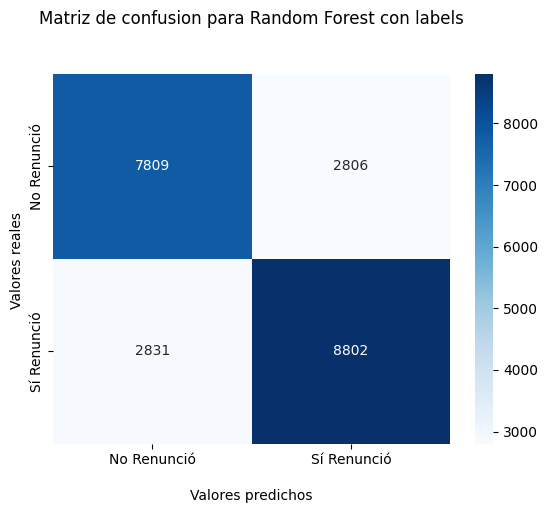

In [48]:
# Gráfico de Matriz de Confusión para Random Forest
rf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(rf_matrix, annot=True, fmt='g', cmap='Blues')
ax.set_title('Matriz de confusion para Random Forest con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
ax.xaxis.set_ticklabels(['No Renunció', 'Sí Renunció'])
ax.yaxis.set_ticklabels(['No Renunció', 'Sí Renunció'])
plt.show()

# Conclusiones

Los resultados de la evaluación de los modelos de clasificación muestran diferencias significativas en su capacidad para predecir la renuncia de empleados. Tanto el modelo de Regresión Logística como el de Random Forest alcanzan una precisión del 75%, lo que indica que son eficaces en la identificación de empleados que permanecen en la empresa y aquellos que renuncian. Las métricas de precisión y recall son coherentes entre ambos modelos, sugiriendo que son herramientas confiables para esta tarea. En contraste, el modelo KNN presenta un rendimiento mucho más bajo, con una precisión del 52%, lo que indica que no es adecuado para este tipo de análisis. En resumen, la Regresión Logística y el Random Forest son opciones sólidas para abordar la predicción de renuncias, mientras que el modelo KNN no logra cumplir con las expectativas en esta base de datos.